In [1]:
import numpy as np
import pandas as pd
import keras
from IPython.display import display
import PIL
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 데이터 시각화 패키지
import matplotlib.pyplot as plt
import matplotlib
# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split
# GridSearchCV : 최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# confusion matrix
from sklearn.metrics import confusion_matrix
# DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
# export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz
# graphviz import: 의사결정 나무 모델 시각화  .dot 확장자 파일 불러오는 패키지
import graphviz

In [3]:
import os
os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

In [4]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

In [33]:
df_raw = pd.read_csv("dataset/credit_train_puri_eng.csv")

In [36]:
df_raw

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.901321,6.0,1.0,228190.0,416746.0,1.0,0.0
1,0,262328.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.000000,35.0,0.0,229976.0,850784.0,0.0,0.0
2,0,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.901321,9.0,0.0,256329.0,386958.0,0.0,0.0
4,0,176220.0,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,20639.70,6.1,34.901321,15.0,0.0,253460.0,427174.0,0.0,0.0
5,1,206602.0,Short Term,7290.000000,8.968570e+05,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,34.901321,6.0,0.0,215308.0,272448.0,0.0,0.0
6,0,217646.0,Short Term,730.000000,1.184194e+06,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.000000,13.0,1.0,122170.0,272052.0,1.0,0.0
7,1,648714.0,Long Term,1076.456089,1.378277e+06,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.000000,15.0,0.0,193306.0,864204.0,0.0,0.0
8,0,548746.0,Short Term,678.000000,2.559110e+06,2 years,Rent,Debt Consolidation,18660.28,22.6,33.000000,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0,215952.0,Short Term,739.000000,1.454735e+06,< 1 year,Rent,Debt Consolidation,39277.75,13.9,34.901321,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [23]:
df_raw.isnull().sum(axis=0)

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [35]:
df_raw['Loan Status']= np.where(df_raw['Loan Status']=='Charged Off', 1, 0)

In [28]:
# df_raw["Loan Status"][df_raw["Loan Status"]=="Charged Off"] = 1
# df_raw["Loan Status"][df_raw["Loan Status"]!=1] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
df_raw_dummy = pd.get_dummies(df_raw)

In [38]:
df_raw_dummy

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,0,445412.0,709.000000,1.167493e+06,5214.74,17.2,34.901321,6.0,1.0,228190.0,...,0,0,0,0,0,0,0,0,0,0
1,0,262328.0,1076.456089,1.378277e+06,33295.98,21.1,8.000000,35.0,0.0,229976.0,...,0,0,0,0,0,0,0,0,0,0
2,0,99999999.0,741.000000,2.231892e+06,29200.53,14.9,29.000000,18.0,1.0,297996.0,...,0,0,0,0,0,0,0,0,0,0
3,0,347666.0,721.000000,8.069490e+05,8741.90,12.0,34.901321,9.0,0.0,256329.0,...,0,0,0,0,0,0,0,0,0,0
4,0,176220.0,1076.456089,1.378277e+06,20639.70,6.1,34.901321,15.0,0.0,253460.0,...,0,0,0,0,0,0,0,0,0,0
5,1,206602.0,7290.000000,8.968570e+05,16367.74,17.3,34.901321,6.0,0.0,215308.0,...,0,0,0,0,0,0,0,0,0,0
6,0,217646.0,730.000000,1.184194e+06,10855.08,19.6,10.000000,13.0,1.0,122170.0,...,0,0,0,0,0,0,0,0,0,0
7,1,648714.0,1076.456089,1.378277e+06,14806.13,8.2,8.000000,15.0,0.0,193306.0,...,0,0,0,0,0,0,0,0,0,0
8,0,548746.0,678.000000,2.559110e+06,18660.28,22.6,33.000000,4.0,0.0,437171.0,...,0,0,0,0,0,0,0,0,0,0
9,0,215952.0,739.000000,1.454735e+06,39277.75,13.9,34.901321,20.0,0.0,669560.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_raw_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95572 entries, 0 to 95571
Data columns (total 46 columns):
Loan Status                       95572 non-null int32
Current Loan Amount               95572 non-null float64
Credit Score                      95572 non-null float64
Annual Income                     95572 non-null float64
Monthly Debt                      95572 non-null float64
Years of Credit History           95572 non-null float64
Months since last delinquent      95572 non-null float64
Number of Open Accounts           95572 non-null float64
Number of Credit Problems         95572 non-null float64
Current Credit Balance            95572 non-null float64
Maximum Open Credit               95572 non-null float64
Bankruptcies                      95572 non-null float64
Tax Liens                         95572 non-null float64
Term_Long Term                    95572 non-null uint8
Term_Short Term                   95572 non-null uint8
Years in current job_1 year       95572 no

In [17]:
df_raw_dummy.to_csv("dataset/credit_train_dummy.csv",index=False)

In [40]:
df_raw_dummy[(df_raw_dummy["Loan Status"]==0)& (df_raw_dummy["Credit Score"]>3300.5)]

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding


In [42]:
# 설명변수, 목표변수 데이터 지정
df_raw_x = df_raw_dummy.drop("Loan Status",axis=1,inplace=False)
df_raw_y = df_raw_dummy["Loan Status"]

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (66900, 45)
train data Y size : (66900,)
test data X size : (28672, 45)
test data Y size : (28672,)


# 모델 생성

### * 기본옵션으로 트리 생성

In [43]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)
# train 데이터 정확도
print("Accuracy on trainning set:{:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on trainning set:1.000
Accuracy on test set: 0.753


In [13]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [44]:
# 임의적으로 트리의 깊이, 분리노드, 최소샘플수 지정
tree_final = DecisionTreeClassifier(max_depth = 7,min_samples_split=8, min_samples_leaf = 20)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 아래 링크 참고 하여 설치
#### https://blog.naver.com/PostView.nhn?blogId=ksh60706&logNo=221324885784&parentCategoryNo=&categoryNo=29&viewDate=&isShowPopularPosts=true&from=search

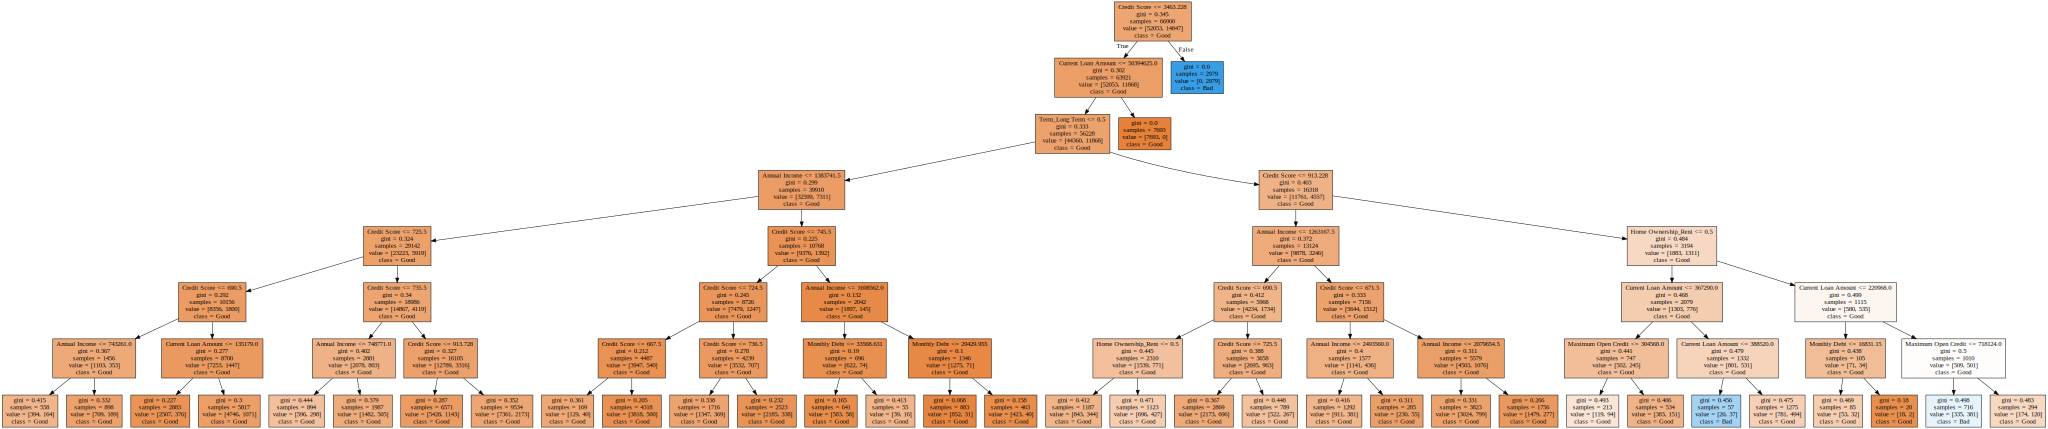

In [45]:
# # 변수명
v_feature_names = df_train_x.columns
# 트리 모델을 tree_depth4.dot 파일로 저장. (목표변수, 0: Good, 1: Bad)

export_graphviz(tree_final, out_file="tree_depth4.dot", class_names = ["Good", "Bad"],
                feature_names = v_feature_names, impurity = True, filled = True)

# graphviz를 이용해 트리 모델 시각화
with open("tree_depth4.dot",encoding="uTf-8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 중요도 평가

In [46]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_names
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance = df_importance[:20]
df_importance.round(3)

,Feature,Importance
1,Credit Score,0.796
0,Current Loan Amount,0.123
12,Term_Long Term,0.042
2,Annual Income,0.030
28,Home Ownership_Rent,0.005
9,Maximum Open Credit,0.003
3,Monthly Debt,0.002
34,Purpose_Home Improvements,0.000
27,Home Ownership_Own Home,0.000
29,Purpose_Business Loan,0.000


Text(0, 0.5, '설명변수')

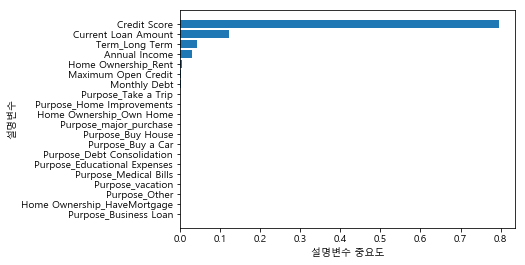

In [47]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림. 
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 의사결정나무 분석결과
1. 고객의 대출상태에 영향을 주는것은 신용점수, 현재 대출 총액, 장기간, 연소득 순이다.
2. 신용점수가 3300.5 이상인 고객은 모두 신용불량 판정난(갚을 능력이 없는 상태)인원들이다.

In [48]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Train Accuracy: {0:.3f}\n".format(tree_final.score(df_train_x, df_train_y)))
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Train Accuracy: 0.824

Test Accuracy: 0.820

Confusion matrix: 
[[22040   164]
 [ 4997  1471]]


#### https://nonmeyet.tistory.com/entry/Confusion-matrix%EC%99%80-Precision-Recall-F1score%EC%9D%98-%EC%9D%B4%ED%95%B4  
결과 해석은 링크 참고

#### 최적화 툴 estimator 사용

In [32]:
# estimator = DecisionTreeClassifier()
# # 구하고자 하는 parameter와 범위
# param_grid = {"max_depth": para_depth, "min_samples_split": para_split,
#               "min_samples_leaf": para_leaf}
# # 정확도가 높은 최적 parameter 찾기
# grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
# grid_dt.fit(df_train_x, df_train_y)

# print("best estimator model: \n{}".format(grid_dt.best_estimator_))
# print("\nbest parameter: \n{}".format(grid_dt.best_params_))
# print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

In [62]:
df_new = pd.read_csv("dataset/train_new.csv")

In [66]:
df_test = pd.read_csv("dataset/credit_test.csv")

In [67]:
del df_test["Loan ID"]
del df_test["Customer ID"]

In [68]:
df_test_dummy = pd.get_dummies(df_test)

In [71]:
df_test_dummy

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
2,153494.0,709.0,871112.0,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,...,0,0,0,0,0,0,0,0,0,0
3,176242.0,727.0,780083.0,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,...,0,0,0,0,0,0,0,0,0,0
4,321992.0,744.0,1761148.0,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,...,0,0,0,0,0,0,0,0,0,0
9,266288.0,683.0,2031518.0,12443.10,24.4,56.0,8.0,2.0,31445.0,251130.0,...,0,0,0,0,0,0,0,0,0,0
11,258104.0,723.0,1284514.0,6368.99,14.6,64.0,12.0,0.0,128402.0,266904.0,...,0,0,0,0,0,0,0,0,0,0
17,218834.0,742.0,1077262.0,19390.64,24.5,29.0,37.0,0.0,212800.0,502876.0,...,0,0,0,0,0,0,0,0,0,0
18,99999999.0,715.0,442339.0,14007.18,17.0,25.0,14.0,0.0,65474.0,284966.0,...,0,0,0,0,0,0,0,0,0,0
19,99999999.0,715.0,694526.0,4358.22,17.3,47.0,5.0,0.0,137332.0,272734.0,...,0,0,0,0,0,0,0,0,0,0
20,346610.0,744.0,2245116.0,24134.94,17.6,68.0,14.0,0.0,729695.0,1307922.0,...,0,0,0,0,0,0,0,0,0,0
23,334620.0,740.0,963300.0,16536.65,16.4,55.0,17.0,0.0,330581.0,843128.0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_test_dummy = df_test_dummy.dropna(axis=0)

In [74]:
df_raw_x = df_test_dummy
df_raw_y = 1

# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
#df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)

print("train data X size : {}".format(df_raw_x.shape))
#print("train data Y size : {}".format(df_raw_y.shape))

train data X size : (3738, 45)


In [75]:
# 평가
y_pred = tree_final.predict(df_raw_x)
print("Train Accuracy: {0:.3f}\n".format(tree_final.score(df_raw_x, df_raw_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_raw_y, y_pred)))

TypeError: Expected sequence or array-like, got <class 'int'>